# projet perso de webscrapping
site : https://www.pokebip.com/pokedex/pokemon l'objectif est d'iterrer sur chaque pokémon afin de recupérer des infos : types, régions et statistiques

In [88]:
import requests
 
url = "https://www.pokebip.com/pokedex/pokemon"
request_text = requests.get(url)


from bs4 import BeautifulSoup

soup = BeautifulSoup(request_text.content,"lxml")

In [89]:
tables = soup.findAll('table')
print(len(tables))

1


il n'y a qu'un tableau sur la page, et il contient les liens vers chaque pokémon, letsgong

In [90]:
table = soup.find('table')
pokemons = table.findAll('a')
pkmnUrls = []
for pkmn in pokemons :
    if not pkmn.attrs.get("class"):
        pkmnUrls.append(pkmn.get('href'))

In [92]:
print(len(pkmnUrls))

1074


on a toute la liste des urls qu'il nous faut pour recuperer les données

In [147]:
import pandas as pd
dataFrame = pd.DataFrame(columns=['Nom','PV','Atk','Def','AtkSpe','DefSpe','Vit'])

for pkmnUrl in pkmnUrls :
    try:
        request_text2 = requests.get(pkmnUrl)
        soup2 = BeautifulSoup(request_text2.content,"lxml")
        table2 = soup2.find('table')
        nom = soup2.find('h1').getText(strip=1).split('- ')[0]
        stats = table2.findAll('strong')
        dataFrame = dataFrame.append({'Nom': nom,'PV' : int(stats[0].getText()),'Atk' : int(stats[1].getText()),'Def' : int(stats[2].getText()),'AtkSpe' : int(stats[3].getText()),'DefSpe' : int(stats[4].getText()),'Vit' : int(stats[5].getText())}, ignore_index=True)
    except Exception:
        continue

on stock tout dans un dataframe qu'on enregistre aussi en fichier

In [169]:
dataFrame.to_csv('StatsPokemons.csv')
dataFrame.to_excel('StatsPokemons.xls')
dataFrame.head()

,Nom,PV,Atk,Def,AtkSpe,DefSpe,Vit
0,Bulbizarre,45,49,49,65,65,45
1,Herbizarre,60,62,63,80,80,60
2,Florizarre,80,82,83,100,100,80
3,Méga-Florizarre,80,100,123,122,120,80
4,Salamèche,39,52,43,60,50,65


Je fais un test pour acceder à la liste des 10 meilleurs pokémons en fonction de leur attaque

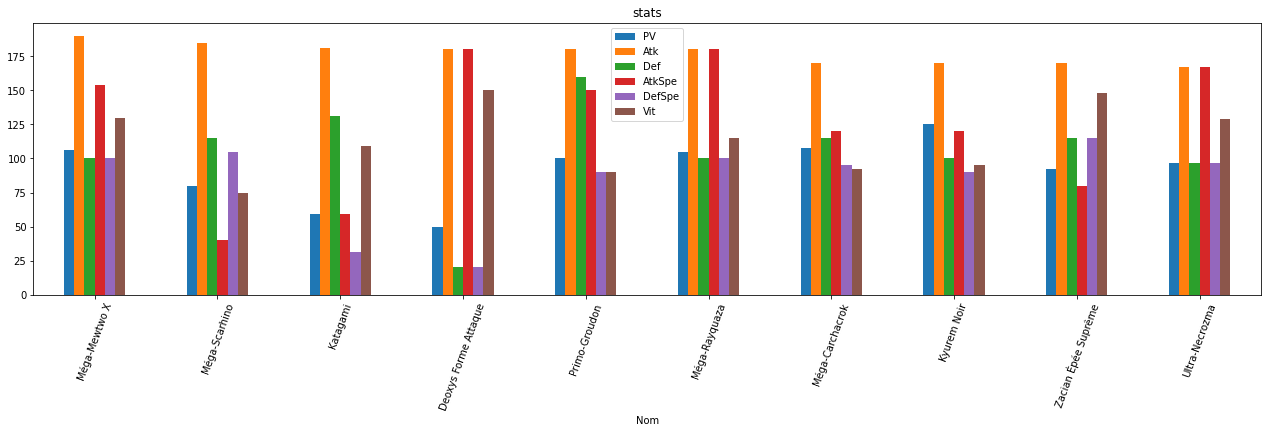

,Nom,PV,Atk,Def,AtkSpe,DefSpe,Vit
192,Méga-Mewtwo X,106,190,100,154,100,130
262,Méga-Scarhino,80,185,115,40,105,75
960,Katagami,59,181,131,59,31,109
464,Deoxys Forme Attaque,50,180,20,180,20,150
459,Primo-Groudon,100,180,160,150,90,90
461,Méga-Rayquaza,105,180,100,180,100,115
529,Méga-Carchacrok,108,170,115,120,95,92
769,Kyurem Noir,125,170,100,120,90,95
1057,Zacian Épée Suprême,92,170,115,80,115,148
965,Ultra-Necrozma,97,167,97,167,97,129


In [187]:
import matplotlib.pyplot as plot
import numpy as np

dataFrame = dataFrame.sort_values(by=["Atk"] ,ascending=False)
dataFrame[:10].plot.bar(x="Nom", y=["PV","Atk","Def","AtkSpe","DefSpe","Vit"], rot=70, title="stats",figsize=(22,5))
plot.show(block=True)
dataFrame.head(10)

